#O Problema

- Descrição do desafio

http://vitibrasil.cnpuv.embrapa.br/index.php?opcao=opt_01

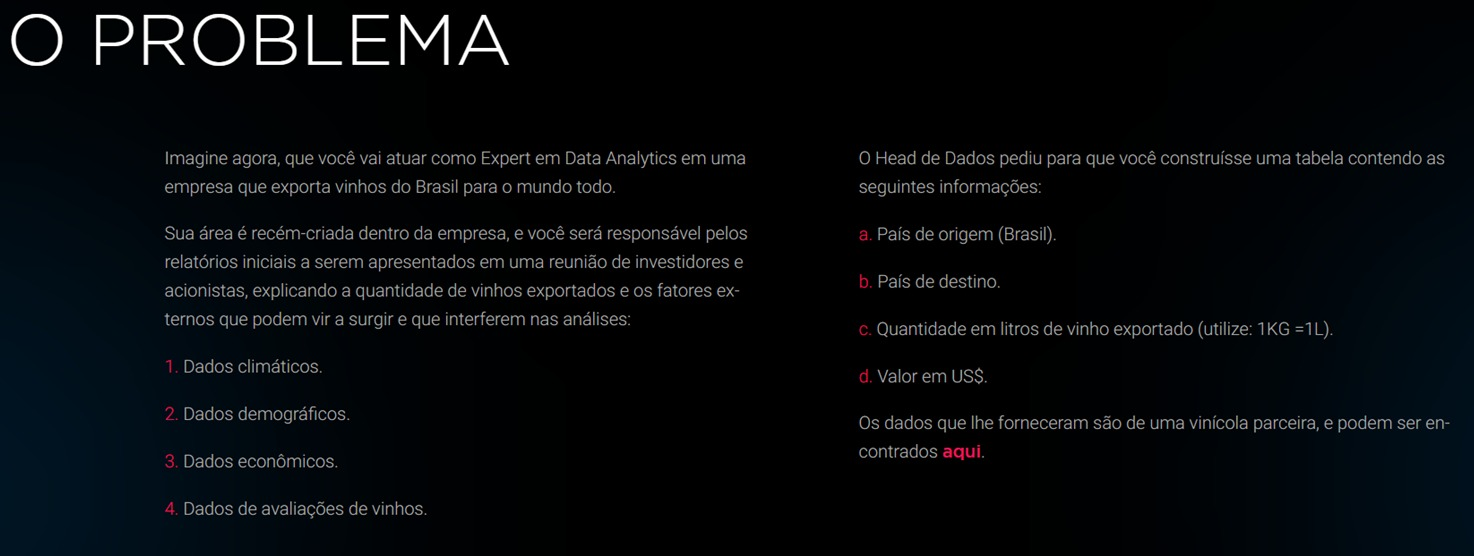

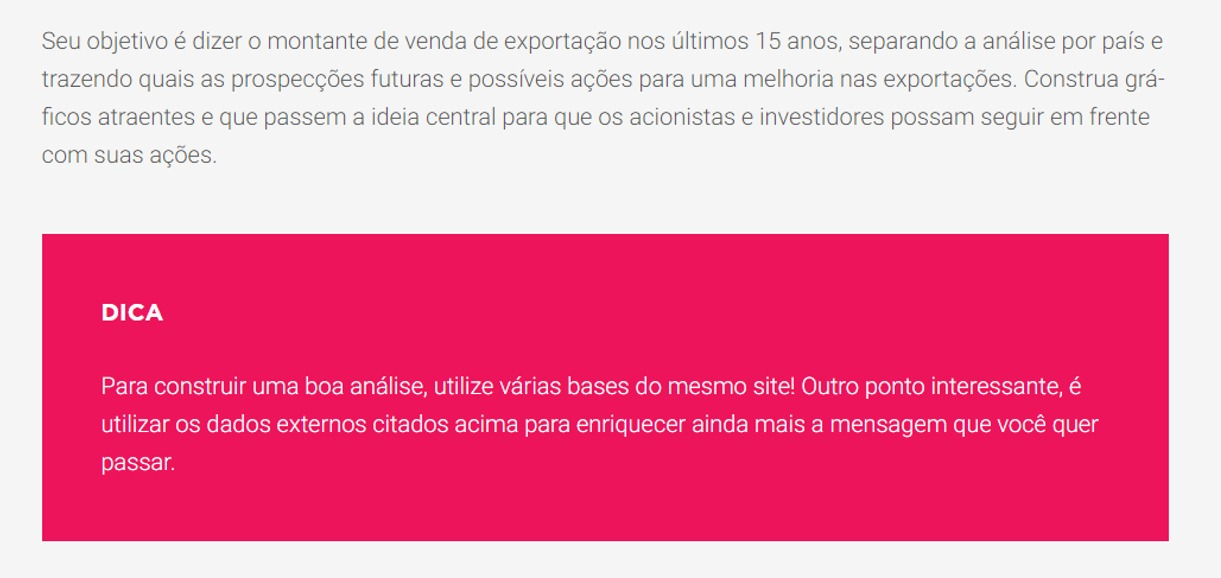

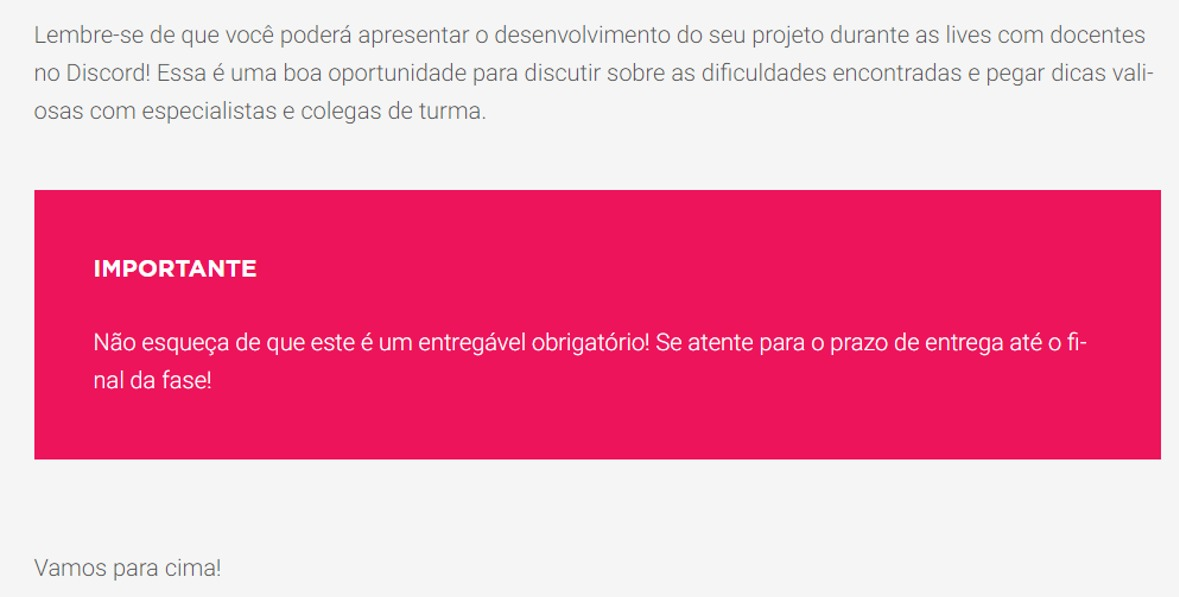

#Pesquisa

- Fonte de dados


1) International Organisation of Vine and Wine

https://www.oiv.int/what-we-do/statistics

* Informações de consumo, importação e exportação

2) Consumo e clima

https://www.wine.com.br/winepedia/curiosidades/mudancas-de-clima-impactam-na-producao-de-vinho/

* O clima também impacta o consumo de vinhos?

3) PIB per capita

Dados:
https://pt.wikipedia.org/wiki/Lista_de_pa%C3%ADses_por_PIB_nominal_per_capita

Informação para o .ppt
https://www.must.jornaldenegocios.pt/prazeres/lugares/detalhe/os-20-paises-mais-ricos-do-mundo-em-2022

#Tratamento dos dados

Para uso - utilize os 4 arquivos disponibilizados.

* 1) Exportação de vinhos de mesa - Brasil
* 2) Importação de vinho - Mundo
* 3) Consumo de vinho - Mundo

##1) Exportações do Brasil para o Mundo

####Importação dos dados

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter

In [ ]:
dados = pd.read_csv('/content/ExpVinho.csv', sep=';')

dados.head(8)

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
3,4,Angola,0,0,0,0,0,0,0,0,...,477,709,345,1065,0,0,0,0,4068,4761
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,Antígua e Barbuda,0,0,0,0,0,0,0,0,...,37,191,219,1549,624,1864,805,2268,419,1866
6,7,Antilhas Holandesas,280,207,4800,3705,3000,1936,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,Argentina,0,0,0,0,0,0,0,0,...,15711,59150,0,0,1015,4176,6,13,480,3232


In [ ]:
dados.tail()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
123,124,Tuvalu,0,0,0,0,0,0,0,0,...,0,0,0,0,2,4,0,0,0,0
124,125,Uruguai,0,0,0,0,0,0,0,0,...,7711,29617,6180,18497,0,0,136774,149842,637117,997367
125,126,Vanuatu,0,0,0,0,0,0,0,0,...,0,0,0,0,18,31,0,0,0,0
126,127,Venezuela,0,0,3200,2000,1350,750,11700,6458,...,71,355,0,0,4086,9808,26415,35944,23220,32351
127,128,Vietnã,0,0,0,0,0,0,0,0,...,0,0,20,32,86,584,0,0,130,277


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Columns: 108 entries, Id to 2022.1
dtypes: int64(107), object(1)
memory usage: 108.1+ KB


In [ ]:
dados.describe()

,Id,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02
mean,64.500000,1062.570312,316.406250,2197.695312,652.070312,2976.718750,946.070312,3681.796875,1365.562500,2788.945312,...,3.012627e+04,5.848487e+04,2.463182e+04,4.636583e+04,3.445091e+04,4.748662e+04,6.295862e+04,7.696830e+04,5.489049e+04,8.551002e+04
std,37.094474,8164.733371,2242.559282,21104.386629,5718.388164,26139.497969,7640.049948,30003.295024,10396.968066,22110.531883,...,2.859996e+05,4.874595e+05,2.146607e+05,3.435221e+05,2.943276e+05,3.487028e+05,5.789220e+05,6.395490e+05,4.539559e+05,6.414746e+05
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,32.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,64.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,1.000000e+00,1.500000e+00,8.500000e+00,2.650000e+01,1.350000e+01,4.700000e+01,3.500000e+01,2.110000e+02
75%,96.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.316000e+03,9.207750e+03,7.497500e+02,2.572500e+03,1.117500e+03,4.706000e+03,1.860750e+03,7.287500e+03,1.954500e+03,7.688250e+03
max,128.000000,89846.000000,23980.000000,237805.000000,64075.000000,291625.000000,84402.000000,332433.000000,115041.000000,243294.000000,...,3.234168e+06,5.494321e+06,2.419537e+06,3.826587e+06,3.299013e+06,3.869243e+06,6.522527e+06,7.192362e+06,5.076670e+06,7.156293e+06


####Filtro da Tabela com os 15 últimos anos
Também foi renomeado as colunas

In [ ]:
df = pd.DataFrame(dados)

In [ ]:
#renomeando a tabela dos valores
df.rename(columns={'2008.1': '2008(US$)', '2009.1': '2009(US$)','2010.1': '2010(US$)','2011.1': '2011(US$)','2012.1': '2012(US$)','2013.1': '2013(US$)','2014.1': '2014(US$)','2015.1': '2015(US$)','2016.1': '2016(US$)','2017.1': '2017(US$)','2018.1': '2018(US$)','2019.1': '2019(US$)','2020.1': '2020(US$)','2021.1': '2021(US$)','2022.1': '2022(US$)'}, inplace=True)

In [ ]:
# DADOS VALOR (US$) DE EXPORTAÇÃO
dados_exp_dinheiro = ['País','2008(US$)', '2009(US$)','2010(US$)','2011(US$)','2012(US$)','2013(US$)','2014(US$)','2015(US$)','2016(US$)','2017(US$)','2018(US$)','2019(US$)','2020(US$)','2021(US$)','2022(US$)']
df_dinheiro = df[dados_exp_dinheiro]
df_dinheiro.head()

,País,2008(US$),2009(US$),2010(US$),2011(US$),2012(US$),2013(US$),2014(US$),2015(US$),2016(US$),2017(US$),2018(US$),2019(US$),2020(US$),2021(US$),2022(US$)
0,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,46,0
1,África do Sul,0,0,0,0,0,0,0,0,0,0,0,95,21,0,0
2,"Alemanha, República Democrática",429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,45367
3,Angola,71083,84235,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0,4761
4,Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#renomeando a tabela das quantidades
df.rename(columns={'2008': '2008(l)', '2009': '2009(l)','2010': '2010(l)','2011': '2011(l)','2012': '2012(l)','2013': '2013(l)','2014': '2014(l)','2015': '2015(l)','2016': '2016(l)','2017': '2017(l)','2018': '2018(l)','2019': '2019(l)','2020': '2020(l)','2021': '2021(l)','2022': '2022(l)'}, inplace=True)

In [ ]:
# QUANTIDADE (KG) - 1kg = 1litro
dados_exp_qtde = ['País','2008(l)', '2009(l)', '2010(l)', '2011(l)', '2012(l)', '2013(l)', '2014(l)', '2015(l)', '2016(l)', '2017(l)', '2018(l)', '2019(l)', '2020(l)', '2021(l)', '2022(l)']
df_qtde = df[dados_exp_qtde]
df_qtde

,País,2008(l),2009(l),2010(l),2011(l),2012(l),2013(l),2014(l),2015(l),2016(l),2017(l),2018(l),2019(l),2020(l),2021(l),2022(l)
0,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
1,África do Sul,0,0,0,0,0,0,0,0,0,0,0,26,4,0,0
2,"Alemanha, República Democrática",265742,225086,27715,36070,8189,61699,213348,10680,14012,15467,10794,3660,6261,2698,7630
3,Angola,25721,54786,33557,13889,2833,1573,12182,1908,7359,10170,477,345,0,0,4068
4,Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Tuvalu,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
124,Uruguai,0,0,914,1238,1135,1526,0,0,0,0,7711,6180,0,136774,637117
125,Vanuatu,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0
126,Venezuela,0,0,0,0,1029,0,14,0,0,680,71,0,4086,26415,23220


####Alterando o Index
Tirando a número da esquerda

In [ ]:
df_dinheiro = df_dinheiro.set_index('País')
df_dinheiro

,2008(US$),2009(US$),2010(US$),2011(US$),2012(US$),2013(US$),2014(US$),2015(US$),2016(US$),2017(US$),2018(US$),2019(US$),2020(US$),2021(US$),2022(US$)
País,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,46,0
África do Sul,0,0,0,0,0,0,0,0,0,0,0,95,21,0,0
"Alemanha, República Democrática",429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,45367
Angola,71083,84235,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0,4761
Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuvalu,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0
Uruguai,0,0,2929,4404,3879,13343,0,0,0,0,29617,18497,0,149842,997367
Vanuatu,0,0,0,0,0,0,0,0,0,0,0,0,31,0,0


In [ ]:
df_qtde = df_qtde.set_index('País')
df_qtde

,2008(l),2009(l),2010(l),2011(l),2012(l),2013(l),2014(l),2015(l),2016(l),2017(l),2018(l),2019(l),2020(l),2021(l),2022(l)
País,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
África do Sul,0,0,0,0,0,0,0,0,0,0,0,26,4,0,0
"Alemanha, República Democrática",265742,225086,27715,36070,8189,61699,213348,10680,14012,15467,10794,3660,6261,2698,7630
Angola,25721,54786,33557,13889,2833,1573,12182,1908,7359,10170,477,345,0,0,4068
Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuvalu,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
Uruguai,0,0,914,1238,1135,1526,0,0,0,0,7711,6180,0,136774,637117
Vanuatu,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0


####Retira dos dados dos paises sem exportação (Tirar os duplicados)

In [ ]:
#tirei os duplicados
df_dinheiro.drop_duplicates(inplace = True)
display(df_dinheiro)

,2008(US$),2009(US$),2010(US$),2011(US$),2012(US$),2013(US$),2014(US$),2015(US$),2016(US$),2017(US$),2018(US$),2019(US$),2020(US$),2021(US$),2022(US$)
País,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,46,0
África do Sul,0,0,0,0,0,0,0,0,0,0,0,95,21,0,0
"Alemanha, República Democrática",429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,45367
Angola,71083,84235,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0,4761
Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuvalu,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0
Uruguai,0,0,2929,4404,3879,13343,0,0,0,0,29617,18497,0,149842,997367
Vanuatu,0,0,0,0,0,0,0,0,0,0,0,0,31,0,0


In [ ]:
#tirei os duplicados
df_qtde.drop_duplicates(inplace = True)
display(df_qtde)

,2008(l),2009(l),2010(l),2011(l),2012(l),2013(l),2014(l),2015(l),2016(l),2017(l),2018(l),2019(l),2020(l),2021(l),2022(l)
País,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
África do Sul,0,0,0,0,0,0,0,0,0,0,0,26,4,0,0
"Alemanha, República Democrática",265742,225086,27715,36070,8189,61699,213348,10680,14012,15467,10794,3660,6261,2698,7630
Angola,25721,54786,33557,13889,2833,1573,12182,1908,7359,10170,477,345,0,0,4068
Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuvalu,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
Uruguai,0,0,914,1238,1135,1526,0,0,0,0,7711,6180,0,136774,637117
Vanuatu,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0


###Criar as somas das colunas

####Dinheiro

In [ ]:
df['Σ(US$)'] = df[['2008(US$)', '2009(US$)','2010(US$)','2011(US$)','2012(US$)','2013(US$)','2014(US$)','2015(US$)','2016(US$)','2017(US$)','2018(US$)','2019(US$)','2020(US$)','2021(US$)','2022(US$)']].sum(axis=1)

In [ ]:
#acrescido a coluna de soma na tabela
dados_exp_dinheiro = ['País','2008(US$)', '2009(US$)','2010(US$)','2011(US$)','2012(US$)','2013(US$)','2014(US$)','2015(US$)','2016(US$)','2017(US$)','2018(US$)','2019(US$)','2020(US$)','2021(US$)','2022(US$)', 'Σ(US$)']
df_dinheiro = df[dados_exp_dinheiro]
df_dinheiro.head()

,País,2008(US$),2009(US$),2010(US$),2011(US$),2012(US$),2013(US$),2014(US$),2015(US$),2016(US$),2017(US$),2018(US$),2019(US$),2020(US$),2021(US$),2022(US$),Σ(US$)
0,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,46,0,46
1,África do Sul,0,0,0,0,0,0,0,0,0,0,0,95,21,0,0,116
2,"Alemanha, República Democrática",429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,45367,2546394
3,Angola,71083,84235,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0,4761,576189
4,Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df["Σ(US$)"].mean()

880033.71875

####qtde

In [ ]:
df['Σ(Litros)'] = df[['2008(l)', '2009(l)', '2010(l)', '2011(l)', '2012(l)', '2013(l)', '2014(l)', '2015(l)', '2016(l)', '2017(l)', '2018(l)', '2019(l)', '2020(l)', '2021(l)', '2022(l)']].sum(axis=1)

In [ ]:
#acrescido a coluna de soma na tabela
dados_exp_qtde = ['País','2008(l)', '2009(l)', '2010(l)', '2011(l)', '2012(l)', '2013(l)', '2014(l)', '2015(l)', '2016(l)', '2017(l)', '2018(l)', '2019(l)', '2020(l)', '2021(l)', '2022(l)', 'Σ(Litros)']
df_qtde = df[dados_exp_qtde]
df_qtde

,País,2008(l),2009(l),2010(l),2011(l),2012(l),2013(l),2014(l),2015(l),2016(l),2017(l),2018(l),2019(l),2020(l),2021(l),2022(l),Σ(Litros)
0,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,11
1,África do Sul,0,0,0,0,0,0,0,0,0,0,0,26,4,0,0,30
2,"Alemanha, República Democrática",265742,225086,27715,36070,8189,61699,213348,10680,14012,15467,10794,3660,6261,2698,7630,909051
3,Angola,25721,54786,33557,13889,2833,1573,12182,1908,7359,10170,477,345,0,0,4068,168868
4,Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Tuvalu,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2
124,Uruguai,0,0,914,1238,1135,1526,0,0,0,0,7711,6180,0,136774,637117,792595
125,Vanuatu,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,18
126,Venezuela,0,0,0,0,1029,0,14,0,0,680,71,0,4086,26415,23220,55515


In [ ]:
df["Σ(Litros)"].mean()

687362.75

### Gráficos

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


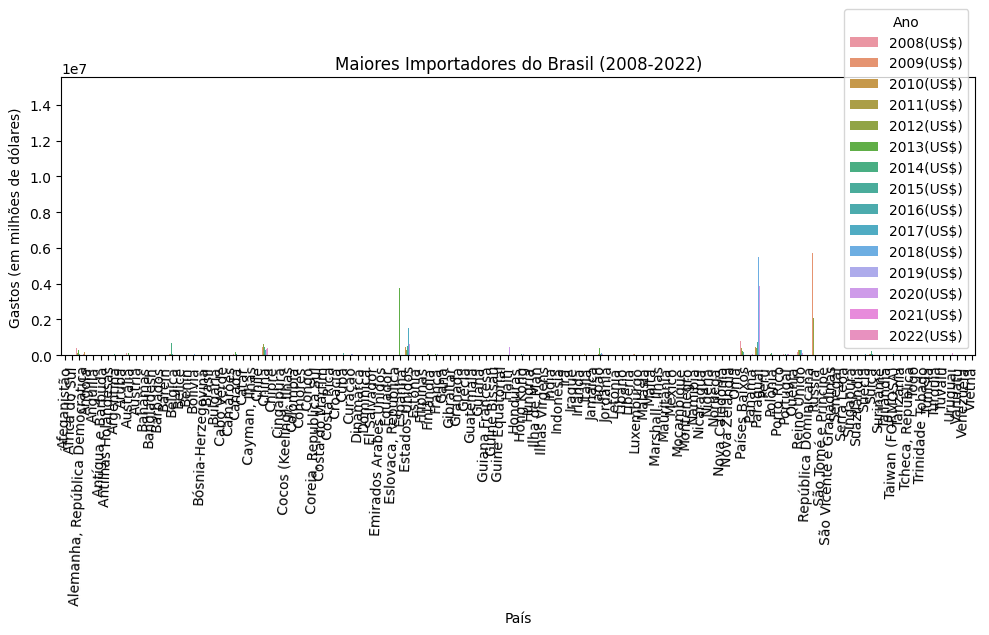

In [ ]:
# Transforme os dados em formato longo (tidy) para o Seaborn
df_long = pd.melt(df, id_vars=['País'], value_vars=['2008(US$)', '2009(US$)','2010(US$)','2011(US$)','2012(US$)','2013(US$)','2014(US$)','2015(US$)','2016(US$)','2017(US$)','2018(US$)','2019(US$)','2020(US$)','2021(US$)','2022(US$)'], var_name='Ano', value_name='Gastos')

# Plote o gráfico de barras usando o Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df_long, x='País', y='Gastos', hue='Ano', order=df_long['País'].unique())
plt.title('Maiores Importadores do Brasil (2008-2022)')
plt.xlabel('País')
plt.ylabel('Gastos (em milhões de dólares)')
plt.xticks(rotation=88)
plt.legend(title='Ano')
plt.tight_layout()

# Exiba o gráfico
plt.show()

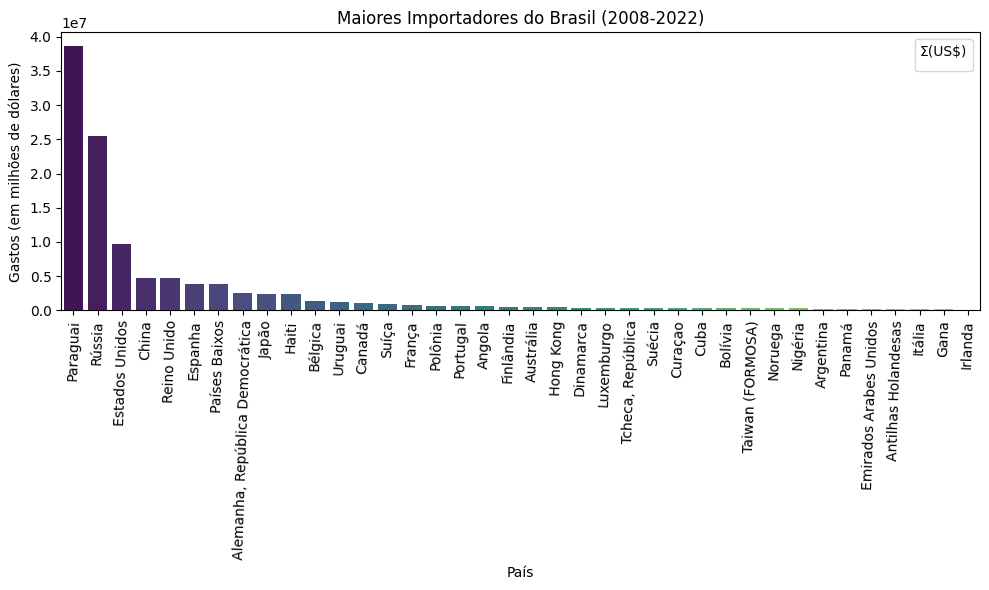

In [ ]:
# Filtrar apenas os países com gastos maiores que 100.000
df = df[df['Σ(US$)'] > 100000]

# Ordene o DataFrame em ordem decrescente pela soma total dos gastos
df = df.sort_values(by='Σ(US$)', ascending=False)

# Plote o gráfico de barras usando o Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df, y='Σ(US$)', x='País', palette='viridis')
plt.title('Maiores Importadores do Brasil (2008-2022)')
plt.xlabel('País')
plt.ylabel('Gastos (em milhões de dólares)')
plt.xticks(rotation=88)
plt.legend(title='Σ(US$)')
plt.tight_layout()

# Exiba o gráfico
plt.show()

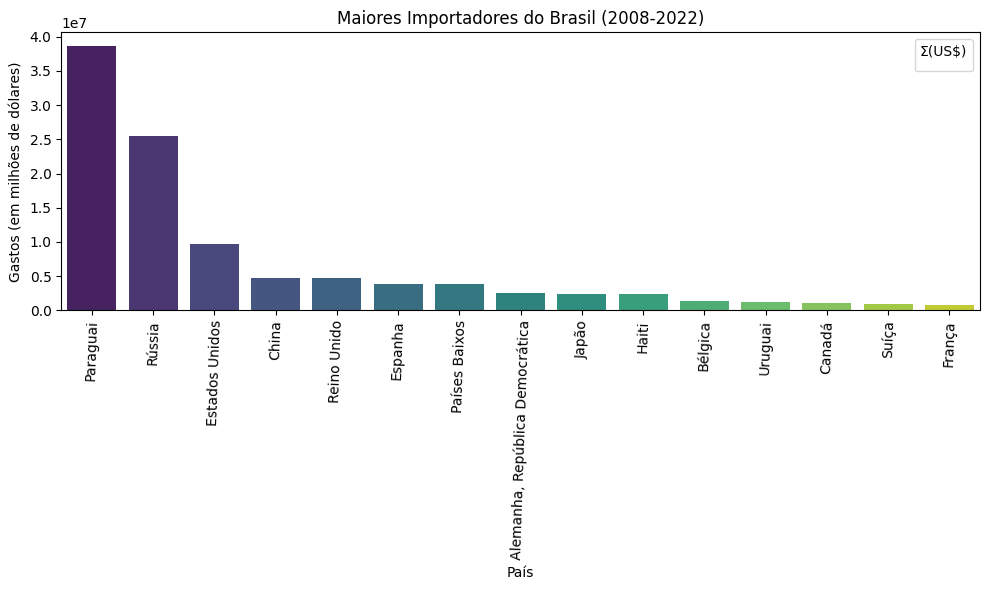

In [ ]:
# Selecione os 15 países com maiores gastos
df_top15 = df.head(15)

# Ordene o DataFrame em ordem decrescente pela soma total dos gastos
df = df.sort_values(by='Σ(US$)', ascending=False)

# Plote o gráfico de barras usando o Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df_top15, y='Σ(US$)', x='País', palette='viridis')
plt.title('Maiores Importadores do Brasil (2008-2022)')
plt.xlabel('País')
plt.ylabel('Gastos (em milhões de dólares)')
plt.xticks(rotation=88)
plt.legend(title='Σ(US$)')
plt.tight_layout()

# Exiba o gráfico
plt.show()

In [ ]:
# Suponha que você já tenha as tabelas df_dinheiro e df_qtde

# Merge das tabelas com base na coluna 'País'
df_vinho = pd.merge(df_dinheiro[['País', 'Σ(US$)']], df_qtde[['País', 'Σ(Litros)']], on='País')

# Exibir a nova tabela com todas as colunas
print(df_vinho)

                                País   Σ(US$)  Σ(Litros)
0                        Afeganistão       46         11
1                      África do Sul      116         30
2    Alemanha, República Democrática  2546394     909051
3                             Angola   576189     168868
4                           Anguilla        0          0
..                               ...      ...        ...
123                           Tuvalu        4          2
124                          Uruguai  1219878     792595
125                          Vanuatu       31         18
126                        Venezuela    88828      55515
127                           Vietnã    13013       9799

[128 rows x 3 columns]


In [ ]:
# Merge das tabelas apenas nas colunas 'País', 'Σ(US$)' e 'Σ(Litros)'
df_vinho = pd.merge(df_dinheiro[['País', 'Σ(US$)']], df_qtde[['País', 'Σ(Litros)']], on='País')

# Calcular a nova coluna 'Σ(US$)/Σ(Litros)'
df_vinho['Σ(US$)/Σ(Litros)'] = df_vinho['Σ(US$)'] / df_vinho['Σ(Litros)']

# Ordenar a tabela em ordem decrescente com base na coluna 'Σ(US$)/Σ(Litros)'
df_vinho = df_vinho.sort_values(by='Σ(US$)/Σ(Litros)', ascending=False)

# Exibir a nova tabela com as colunas indicadas e a nova coluna calculada
df_vinho.head(15)


,País,Σ(US$),Σ(Litros),Σ(US$)/Σ(Litros)
46,"Eslovaca, Republica",16063,585,27.458120
21,Bulgária,1610,122,13.196721
12,Bangladesh,133,12,11.083333
38,Croácia,607,55,11.036364
77,Letônia,3723,387,9.620155
84,Mauritânia,85,9,9.444444
44,Emirados Arabes Unidos,144843,17312,8.366624
10,Áustria,5432,681,7.976505
91,Noruega,262452,34355,7.639412
65,Hungria,4686,627,7.473684


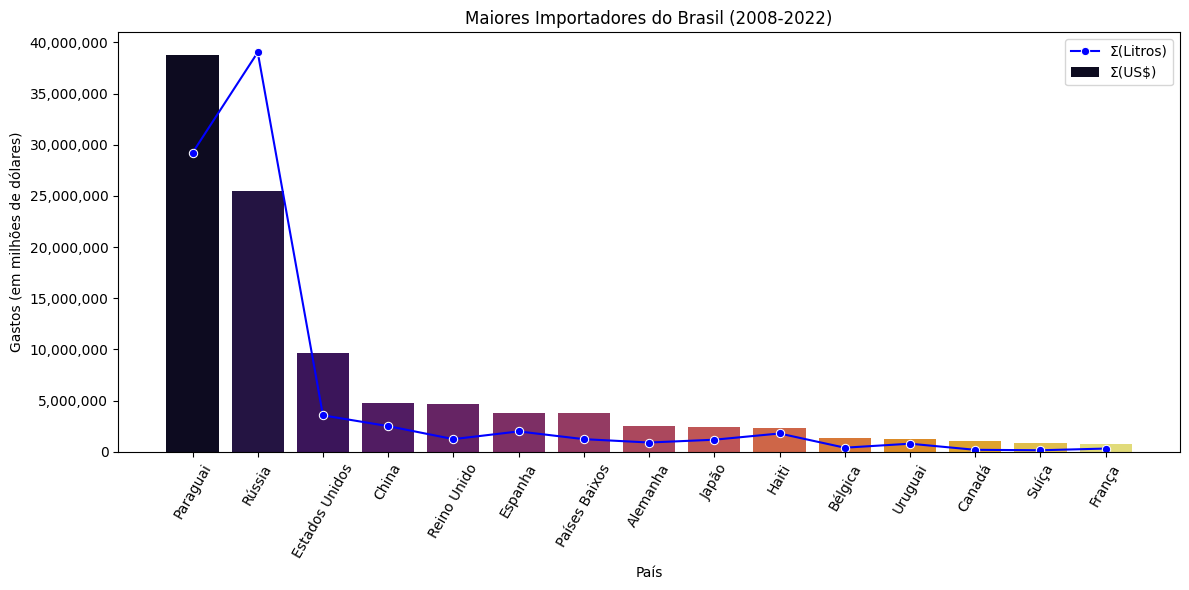

In [ ]:
# Selecione os 15 países com maiores gastos
df_top15 = df.head(15)

df_top15.loc[df_top15['País'] == 'Alemanha, República Democrática', 'País'] = 'Alemanha'

# Ordene o DataFrame em ordem decrescente pela soma total dos gastos
df = df.sort_values(by='Σ(US$)', ascending=False)

# Definir uma função para formatar os rótulos do eixo y com separador numérico
def format_with_separator(value, tick_number):
    return '{:,.0f}'.format(value)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_top15, y='Σ(US$)', x='País', palette='inferno', label='Σ(US$)')
sns.lineplot(data=df_top15, x='País', y='Σ(Litros)', color='blue', marker='o', label='Σ(Litros)')

# Aplicar o separador numérico ao eixo y
formatter = FuncFormatter(format_with_separator)
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Maiores Importadores do Brasil (2008-2022)')
plt.xlabel('País')
plt.ylabel('Gastos (em milhões de dólares)')
plt.xticks(rotation=60)
sns.set_style("whitegrid")  # Adiciona linhas de grade
plt.tight_layout()
plt.show()

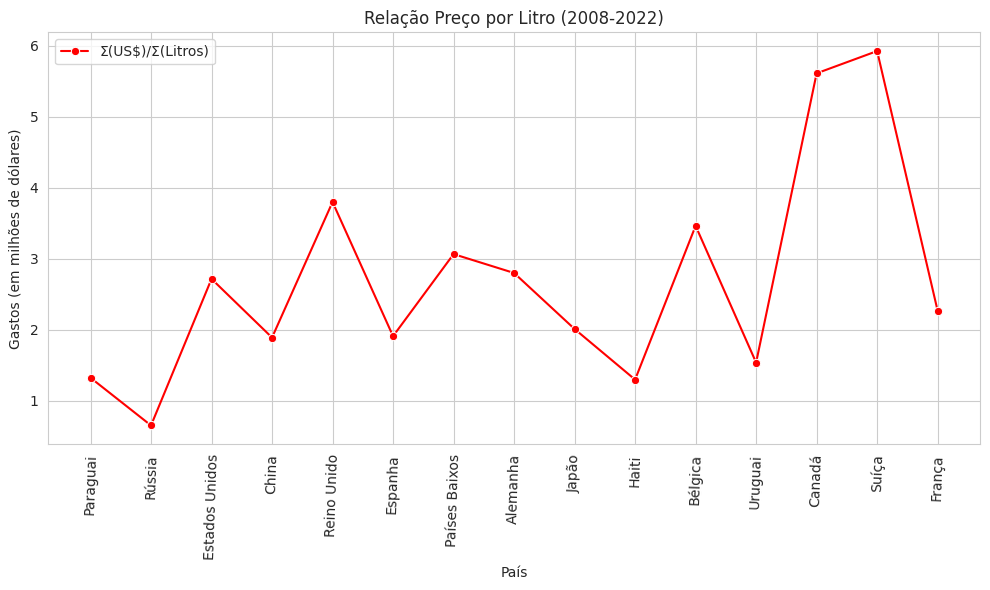

In [ ]:
# Selecione os 15 países com maiores gastos
df_top15 = df.head(15)

# Ordene o DataFrame em ordem decrescente pela soma total dos gastos
df = df.sort_values(by='Σ(US$)', ascending=False)

df_top15['Σ(US$)/Σ(Litros)'] = df_top15['Σ(US$)'] / df_top15['Σ(Litros)']# Calcular a nova variável

# Plote o gráfico de barras usando o Seaborn
plt.figure(figsize=(10, 6))
#sns.barplot(data=df_top15, y='Σ(US$)', x='País', palette='viridis', label='Σ(US$)')
#sns.lineplot(data=df_top15, x='País', y='Σ(Litros)', color='green', marker='o', label='Σ(Litros)')
sns.lineplot(data=df_top15, x='País', y='Σ(US$)/Σ(Litros)', color='red', marker='o', label='Σ(US$)/Σ(Litros)')
plt.title('Relação Preço por Litro (2008-2022)')
plt.xlabel('País')
plt.ylabel('Gastos (em milhões de dólares)')
plt.xticks(rotation=88)
plt.tight_layout()
plt.show()# Exiba o gráfico

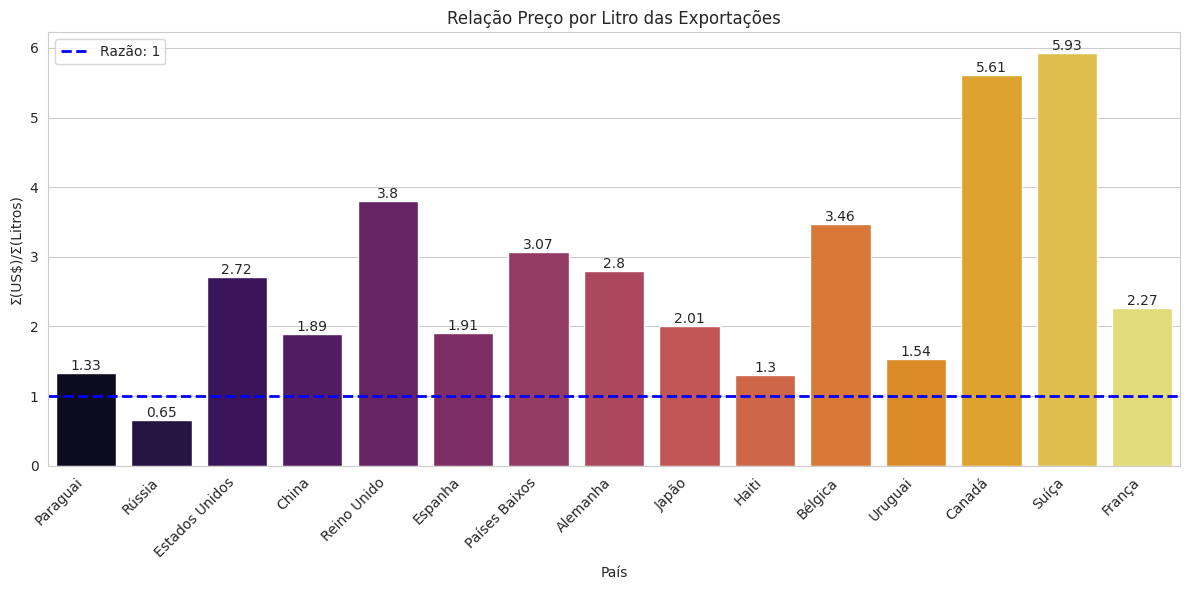

In [ ]:
# Calcular a razão entre 'Σ(US$)' e 'Σ(Litros)'
df_top15['Σ(US$)/Σ(Litros)'] = df_top15['Σ(US$)'] / df_top15['Σ(Litros)']

# Criar o gráfico
plt.figure(figsize=(12, 6))  # Ajuste o tamanho do gráfico conforme necessário
sns.barplot(data=df_top15, x='País', y='Σ(US$)/Σ(Litros)', palette='inferno')

plt.xticks(rotation=45, ha='right')# Rotacionar rótulos do eixo x para melhor visualização

# Adicionar rótulos aos valores no topo das barras
for index, value in enumerate(df_top15['Σ(US$)/Σ(Litros)']):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')

plt.axhline(y=1, color='blue', linestyle='--', linewidth=2, label='Razão: 1')# Adicionar uma linha horizontal de meta em y=0.5
plt.xlabel('País')
plt.ylabel('Σ(US$)/Σ(Litros)')
plt.title('Relação Preço por Litro das Exportações')# Adicionar título ao gráfico
plt.tight_layout()# Exibir o gráfico
plt.legend()
plt.show()

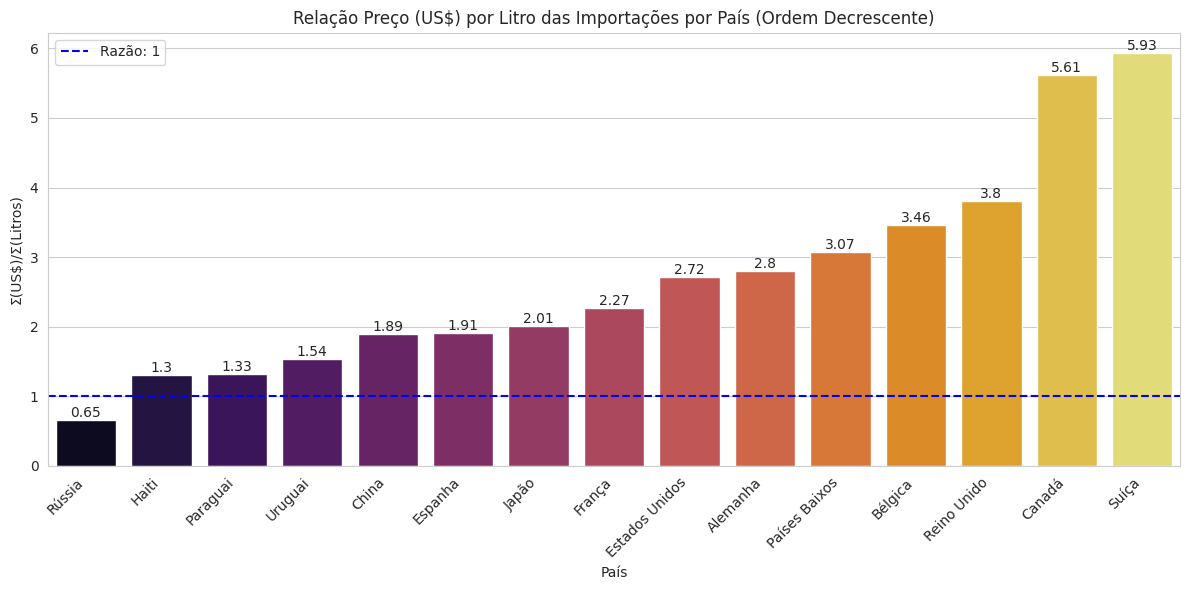

In [ ]:
# Calcular a razão entre 'Σ(US$)' e 'Σ(Litros)'
df_top15['Σ(US$)/Σ(Litros)'] = df_top15['Σ(US$)'] / df_top15['Σ(Litros)']

# Ordenar o DataFrame em ordem decrescente com base na razão 'Σ(US$)/Σ(Litros)'
df_top15_sorted = df_top15.sort_values(by='Σ(US$)/Σ(Litros)', ascending=True)

# Definir uma função para formatar os rótulos do eixo y com separador numérico
def format_with_separator(value, tick_number):
    return '{:,.0f}'.format(value)

# Criar o gráfico em ordem decrescente
plt.figure(figsize=(12, 6))  # Ajuste o tamanho do gráfico conforme necessário
sns.barplot(data=df_top15_sorted, x='País', y='Σ(US$)/Σ(Litros)', palette='inferno')

# Rotacionar rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

# Adicionar rótulos aos valores no topo das barras
for index, value in enumerate(df_top15_sorted['Σ(US$)/Σ(Litros)']):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')

# Adicionar uma linha horizontal de meta em y=0.5
plt.axhline(y=1, color='blue', linestyle='--', linewidth=1.5, label='Razão: 1')

# Aplicar o separador numérico ao eixo y
formatter = FuncFormatter(format_with_separator)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('País')
plt.ylabel('Σ(US$)/Σ(Litros)')
plt.title('Relação Preço (US$) por Litro das Importações por País (Ordem Decrescente)')
plt.tight_layout()
plt.legend()
plt.show()

##2) Importação de Vinho  - Maiores importadores do Mundo

In [ ]:
oivimp = pd.read_csv('/content/data_oiv_importacao.csv', sep=',')
oivimp.head()

,Continent,Region/Country,Product,Variable,Year,Unit,Quantity
0,Asia,Afghanistan,Wine,Imports,2013,1000 hl,0
1,Oceania,American Samoa,Wine,Imports,2008,1000 hl,0
2,Oceania,American Samoa,Wine,Imports,2009,1000 hl,0
3,Oceania,American Samoa,Wine,Imports,2011,1000 hl,0
4,Oceania,American Samoa,Wine,Imports,2012,1000 hl,0


In [ ]:
df = pd.DataFrame(oivimp)

In [ ]:
# Certifique-se de que a coluna 'Quantidade' seja tratada como números (caso não seja)
oivimp['Quantity'] = oivimp['Quantity'].str.replace(' ', '').astype(int)

# Calcule a soma total da coluna 'Quantidade' mantendo os valores da coluna 'País' intactos
soma_imp = df['Quantity'].sum()

# Calcule a soma total da coluna 'Quantidade' para cada país
df_soma_imp = df.groupby('Region/Country')['Quantity'].sum().reset_index()

# Exiba o novo DataFrame com a soma da coluna 'Quantidade' por país
df_soma_imp.head()

,Region/Country,Quantity
0,Afghanistan,16
1,Albania,582
2,Algeria,898
3,American Samoa,2
4,Angola,12291


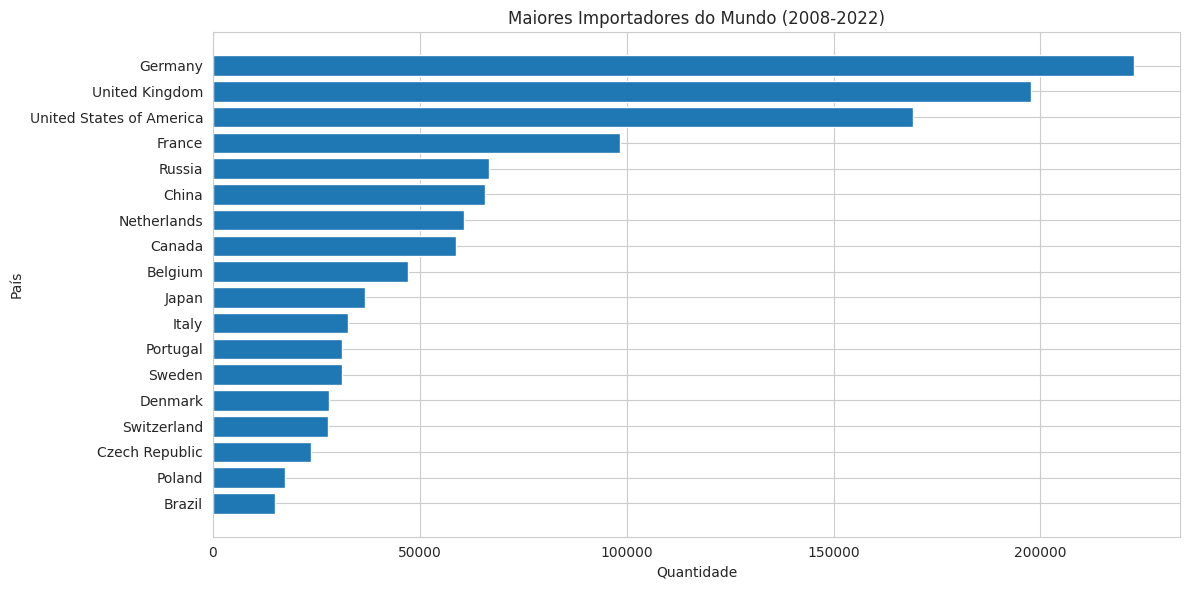

In [ ]:
# Ordenar o DataFrame em ordem decrescente com base na coluna 'Quantidade' e pegar os top 15 países
df_imp_15 = df_soma_imp.sort_values(by='Quantity', ascending=False).head(18)

# Filtrar os dados onde Variable é igual a 'Consumption'
df_consumption = df.query("Variable == 'Consumption'")

# Extrair os dados dos eixos x e y
paises = df_imp_15['Region/Country']
quantidades = df_imp_15['Quantity']

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))  # Tamanho da figura (opcional)
plt.barh(paises, quantidades)  # Usar barh para um gráfico de barras horizontais
plt.xlabel('Quantidade')
plt.ylabel('País')
plt.title('Maiores Importadores do Mundo (2008-2022)')
plt.gca().invert_yaxis()  # Inverter a ordem para que o país com a maior quantidade fique no topo
plt.tight_layout()  # Ajustar a layout para evitar cortar rótulos (opcional)
plt.show()

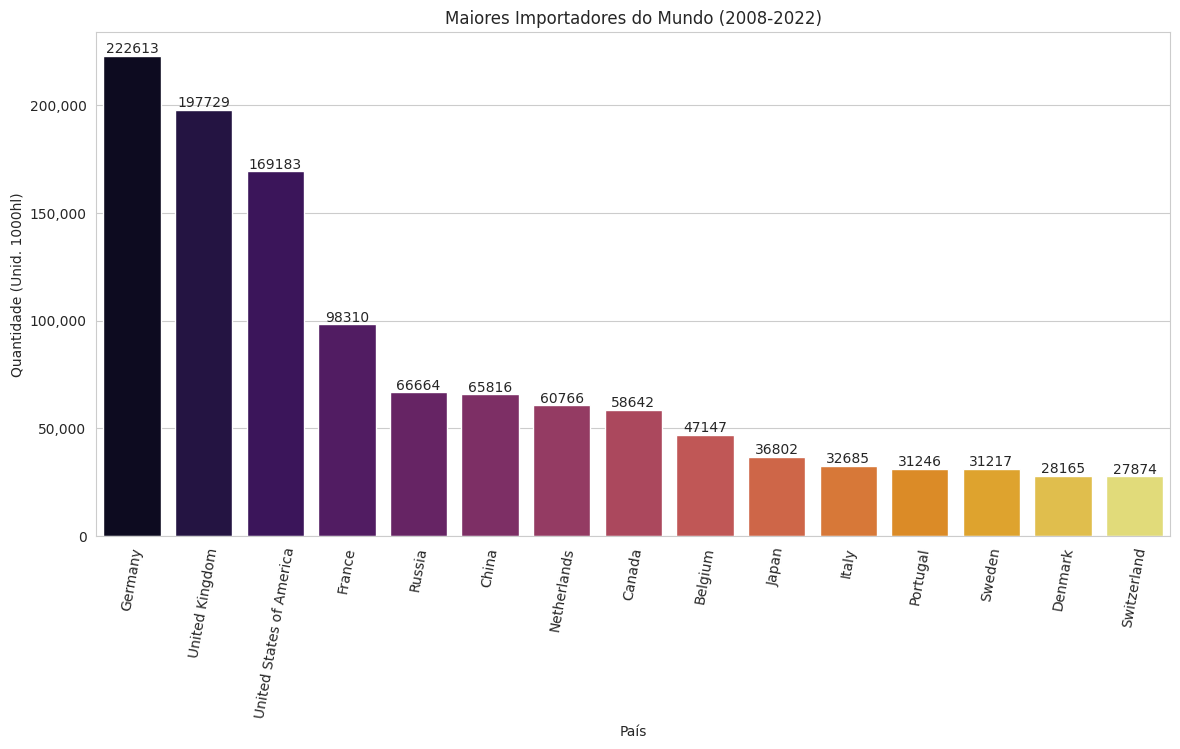

In [ ]:
# Ordenar o DataFrame em ordem decrescente com base na coluna 'Quantidade' e pegar os top 15 países
df_imp_15 = df_soma_imp.sort_values(by='Quantity', ascending=False).head(15)

# Definir uma função para formatar os rótulos do eixo y com separador numérico
def format_with_separator(value, tick_number):
    return '{:,.0f}'.format(value)

# Criar o gráfico de barras verticais usando o Seaborn
plt.figure(figsize=(12, 6))  # Tamanho da figura (opcional)
sns.barplot(y='Quantity', x='Region/Country', data=df_imp_15, palette='inferno')

# Adicionar rótulo aos valores das barras
for index, value in enumerate(df_imp_15['Quantity']):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Aplicar o separador numérico ao eixo y
formatter = FuncFormatter(format_with_separator)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('País')
plt.ylabel('Quantidade (Unid. 1000hl)')
plt.title('Maiores Importadores do Mundo (2008-2022)')
plt.tight_layout()  # Ajustar a layout para evitar cortar rótulos (opcional)
plt.xticks(rotation=80)
plt.show()

In [ ]:
df_imp_15 = df_soma_imp.sort_values(by='Quantity', ascending=False).head(15)
df_imp_15.head(18)

,Region/Country,Quantity
71,Germany,222613
198,United Kingdom,197729
199,United States of America,169183
65,France,98310
155,Russia,66664
39,China,65816
131,Netherlands,60766
34,Canada,58642
17,Belgium,47147
94,Japan,36802


##3) Consumo de Vinho - Maiores Consumidores do Mundo

In [ ]:
oivcon = pd.read_csv('/content/data_oiv_consumo.csv', sep=',')
oivcon.head()

,Continent,Region/Country,Product,Variable,Year,Unit,Quantity
0,Oceania,American Samoa,Wine,Consumption,2008,1000 hl,0
1,Oceania,American Samoa,Wine,Consumption,2009,1000 hl,0
2,Oceania,American Samoa,Wine,Consumption,2011,1000 hl,0
3,Oceania,American Samoa,Wine,Consumption,2012,1000 hl,0
4,Oceania,American Samoa,Wine,Consumption,2013,1000 hl,0


In [ ]:
df = pd.DataFrame(oivcon)

In [ ]:
# Certifique-se de que a coluna 'Quantidade' seja tratada como números (caso não seja)
oivcon['Quantity'] = oivcon['Quantity'].str.replace(' ', '').astype(int)

# Calcule a soma total da coluna 'Quantidade' mantendo os valores da coluna 'País' intactos
soma_con = df['Quantity'].sum()

# Calcule a soma total da coluna 'Quantidade' para cada país
df_soma_con = df.groupby('Region/Country')['Quantity'].sum().reset_index()

# Exiba o novo DataFrame com a soma da coluna 'Quantidade' por país
df_soma_con.head()

,Region/Country,Quantity
0,Afghanistan,17
1,Albania,3352
2,Algeria,4039
3,American Samoa,3
4,Angola,11655


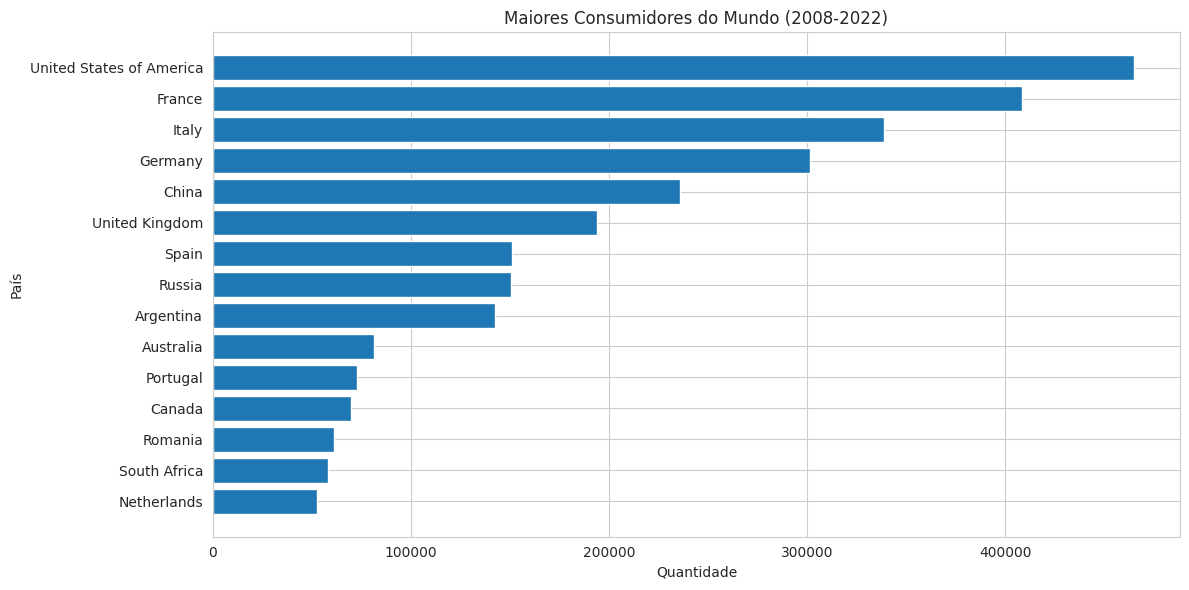

In [ ]:
# Ordenar o DataFrame em ordem decrescente com base na coluna 'Quantidade' e pegar os top 15 países
df_con_15 = df_soma_con.sort_values(by='Quantity', ascending=False).head(15)

# Filtrar os dados onde Variable é igual a 'Consumption'
df_consumption = df.query("Variable == 'Consumption'")

# Extrair os dados dos eixos x e y
paiscon = df_con_15['Region/Country']
quantidadecon = df_con_15['Quantity']

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))  # Tamanho da figura (opcional)
plt.barh(paiscon, quantidadecon)  # Usar barh para um gráfico de barras horizontais
plt.xlabel('Quantidade')
plt.ylabel('País')
plt.title('Maiores Consumidores do Mundo (2008-2022)')
plt.gca().invert_yaxis()  # Inverter a ordem para que o país com a maior quantidade fique no topo
plt.tight_layout()  # Ajustar a layout para evitar cortar rótulos (opcional)
plt.show()

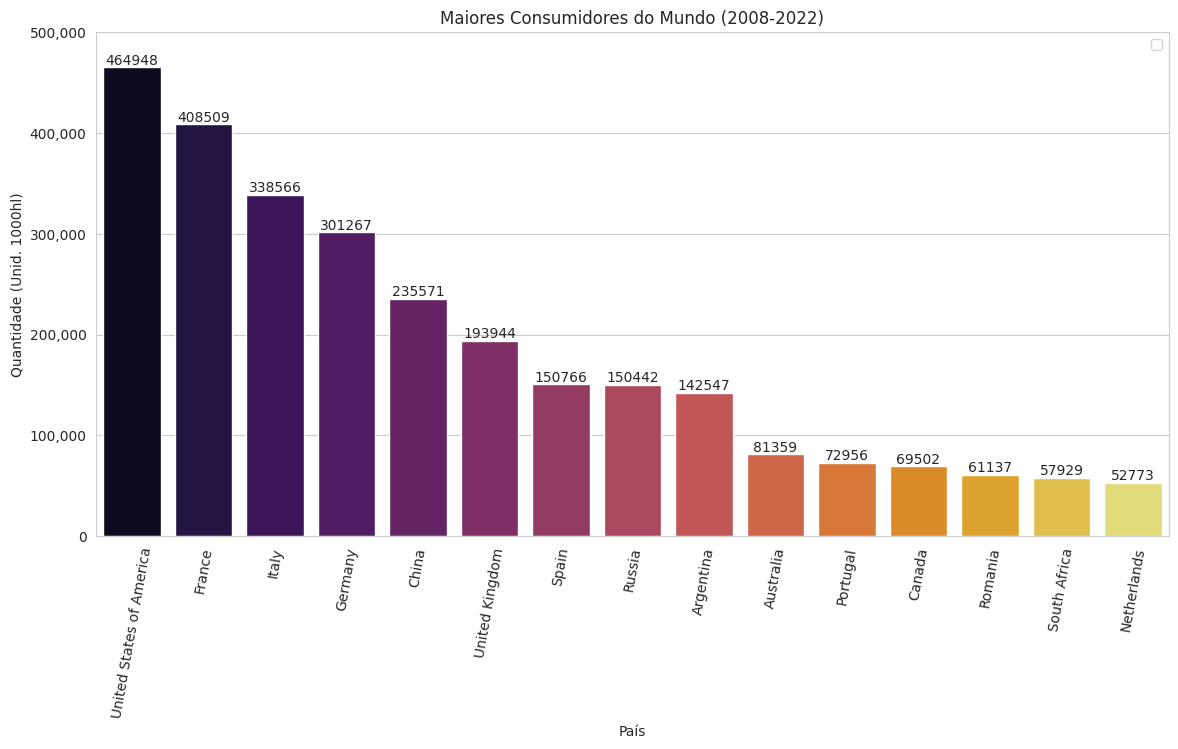

In [ ]:
# Ordenar o DataFrame em ordem decrescente com base na coluna 'Quantidade' e pegar os top 15 países
df_con_15 = df_soma_con.sort_values(by='Quantity', ascending=False).head(15)

# Definir uma função para formatar os rótulos do eixo y com separador numérico
def format_with_separator(value, tick_number):
    return '{:,.0f}'.format(value)

# Criar o gráfico de barras verticais usando o Seaborn
plt.figure(figsize=(12, 6))  # Tamanho da figura (opcional)
sns.barplot(y='Quantity', x='Region/Country', data=df_con_15, palette='inferno')

# Adicionar rótulo aos valores das barras
for index, value in enumerate(df_con_15['Quantity']):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Aplicar o separador numérico ao eixo y
formatter = FuncFormatter(format_with_separator)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('País')
plt.ylabel('Quantidade (Unid. 1000hl)')
plt.ylim(0, 500000)
plt.title('Maiores Consumidores do Mundo (2008-2022)')
plt.tight_layout()  # Ajustar a layout para evitar cortar rótulos (opcional)
plt.legend()
plt.xticks(rotation=80)
plt.show()

In [ ]:
df_con_15 = df_soma_con.sort_values(by='Quantity', ascending=False).head(16)
df_con_15.head(16)

,Region/Country,Quantity
188,United States of America,464948
60,France,408509
87,Italy,338566
66,Germany,301267
35,China,235571
187,United Kingdom,193944
166,Spain,150766
146,Russia,150442
6,Argentina,142547
8,Australia,81359


In [ ]:
# Função para substituir o nome
def substituir_nome(df_mundo):
    df_mundo['Region/Country'] = df_mundo['Region/Country'].replace('France', 'França')
    df_mundo['Region/Country'] = df_mundo['Region/Country'].replace('United States of America', 'Estados Unidos')
    df_mundo['Region/Country'] = df_mundo['Region/Country'].replace('Italy', 'Itália')
    df_mundo['Region/Country'] = df_mundo['Region/Country'].replace('Germany', 'Alemanha')
    df_mundo['Region/Country'] = df_mundo['Region/Country'].replace('United Kingdom', 'Reino Unido')
    df_mundo['Region/Country'] = df_mundo['Region/Country'].replace('Spain', 'Espanha')
    df_mundo['Region/Country'] = df_mundo['Region/Country'].replace('South Africa', 'África do Sul')
    df_mundo['Region/Country'] = df_mundo['Region/Country'].replace('Netherlands', 'Países Baixos')
    return df_mundo

# Função para reverter a substituição
def reverter_substituicao(df_mundo):
    df_mundo['Region/Country'] = df_mundo['Region/Country'].replace('França', 'France')
    df_mundo['Region/Country'] = df_mundo['Region/Country'].replace('Estados Unidos', 'United States of America')
    df_mundo['Region/Country'] = df_mundo['Region/Country'].replace('Itália', 'Italy')
    df_mundo['Region/Country'] = df_mundo['Region/Country'].replace('Alemanha', 'Germany')
    df_mundo['Region/Country'] = df_mundo['Region/Country'].replace('Reino Unido', 'United Kingdom')
    df_mundo['Region/Country'] = df_mundo['Region/Country'].replace('Espanha', 'Spain')
    df_mundo['Region/Country'] = df_mundo['Region/Country'].replace('África do Sul', 'South Africa')
    df_mundo['Region/Country'] = df_mundo['Region/Country'].replace('Países Baixos', 'Netherlands')
    return df_mundo

# Para fazer a substituição
df_soma_con = substituir_nome(df_soma_con)
###----------------------------------

# Ordenar o DataFrame em ordem decrescente com base na coluna 'Quantidade' e pegar os top 15 países
df_con_15 = df_soma_con.sort_values(by='Quantity', ascending=False).head(15)
df_imp_15 = df_soma_imp.sort_values(by='Quantity', ascending=False).head(15)

top_15c_paises = df_mundo.nlargest(15, 'qtde_con')
top_15d_paises = df_mundo.nlargest(15, 'qtde_imp')

# Calcular a média top_15_paises
media_c = top_15c_paises['qtde_con'].mean()
media_d = top_15d_paises['qtde_imp'].mean()

# Definir uma função para formatar os rótulos do eixo y com separador numérico
def format_with_separator(value, tick_number):
    return '{:,.0f}'.format(value)

# Criar o gráfico de barras verticais usando o Seaborn -
plt.figure(figsize=(12, 6))  # Tamanho da figura (opcional)
sns.barplot(y='Quantity', x='Region/Country', data=df_con_15, palette='inferno', label='Consumo')
sns.lineplot(data=df_imp_15 , x='Region/Country', y='Quantity', color='blue', marker='o', label='Importação')
plt.axhline(media_c, color='green', linestyle='dashed', linewidth=2, label=f'Média Consumo Top 15: {media_c:.0f}')
plt.axhline(media_d, color='pink', linestyle='dashed', linewidth=2, label=f'Média Importação Top 15: {media_d:.0f}')
# Aplicar o separador numérico ao eixo y
formatter = FuncFormatter(format_with_separator)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('País')
plt.ylabel('Quantidade - Unid. 1000hl')
plt.title('Maiores Consumidores e Importadores do Mundo (2008-2022)')
plt.ylim(0, 500000)
plt.tight_layout()  # Ajustar a layout para evitar cortar rótulos (opcional)
plt.legend()
plt.xticks(rotation=80)
plt.show()

NameError: ignored

In [ ]:
# Para reverter a substituição
df_soma_con = reverter_substituicao(df_soma_con)

df_soma_imp.rename(columns={'Quantity': 'qtde_imp'}, inplace=True)
df_soma_con.rename(columns={'Quantity': 'qtde_con'}, inplace=True)

# Merge das tabelas nas colunas 'País', 'qtde_imp' e 'qtde_con'
df_mundo = pd.merge(df_soma_imp[['Region/Country', 'qtde_imp']], df_soma_con[['Region/Country', 'qtde_con']], on='Region/Country')

# Calcular a nova coluna 'qtde_con/qtde_imp'
df_mundo['qtde_imp/qtde_con'] = df_mundo['qtde_imp'] / df_mundo['qtde_con']

# Ordenar a tabela em ordem decrescente com base na coluna qtde_con
df_mundo = df_mundo.sort_values(by='qtde_con', ascending=False)

# Ordenar a tabela em ordem decrescente com base na coluna 'qtde_con/qtde_imp'
#df_completo = df_completo.sort_values(by='qtde_con/qtde_imp', ascending=False)

# Exibir a nova tabela com as colunas indicadas e a nova coluna calculada
df_mundo.head(20)


In [ ]:
# Substituir
df_mundo['Region/Country'] = df_mundo['Region/Country'].replace('France', 'França')
df_mundo['Region/Country'] = df_mundo['Region/Country'].replace('United States of America', 'Estados Unidos')
df_mundo['Region/Country'] = df_mundo['Region/Country'].replace('Italy', 'Itália')
df_mundo['Region/Country'] = df_mundo['Region/Country'].replace('Germany', 'Alemanha')
df_mundo['Region/Country'] = df_mundo['Region/Country'].replace('United Kingdom', 'Reino Unido')
df_mundo['Region/Country'] = df_mundo['Region/Country'].replace('Spain', 'Espanha')
df_mundo['Region/Country'] = df_mundo['Region/Country'].replace('South Africa', 'África do Sul')
df_mundo['Region/Country'] = df_mundo['Region/Country'].replace('Netherlands', 'Países Baixos')

# Selecionar os 15 maiores registros
top_15_paises = df_mundo.nlargest(15, 'qtde_con')

# Calcular a média da razão qtde_imp/qtde_con
media_a = top_15_paises['qtde_imp/qtde_con'].mean()

# Criar o gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x='Region/Country', y='qtde_imp/qtde_con', data=top_15_paises, palette='inferno')
plt.axhline(media_a, color='blue', linestyle='dashed', linewidth=1, label=f'Média Top 15: {media_a:.2f}')
plt.xlabel('País/Região')
plt.ylabel('qtde_imp/qtde_con')
plt.title('Razão entre importação e consumo - 15 Maiores Países de Consumo')
plt.xticks(rotation=70)  # Rotaciona os rótulos do eixo x para facilitar a leitura

# Adicionar rótulos aos valores das barras
for index, value in enumerate(top_15_paises['qtde_imp/qtde_con']):
    plt.text(index, value, round(value, 2), ha='center', va='bottom')

plt.legend()
plt.tight_layout()
plt.show()

##Temperatura dos Paises - Top 15

In [ ]:
# Crie um dicionário com os dados
#temperat = {
#    'País': ['United States of America', 'France', 'Italy', 'Germany', 'China', 'United Kingdom', 'Spain', 'Russia', 'Argentina', 'Australia', 'Portugal', 'Canada', 'Romania', 'South Africa', 'Netherlands', 'Brazil', 'Belgium', 'Japan', 'Sweden', 'Denmark', 'Switzerland', 'Czech Republic', 'Poland'],
#    'Temperatura Média (°C)': [21.8, 6.6, 6, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 27, 40]
#}

## Crie um DataFrame a partir do dicionário
#tabela_temperat = pd.DataFrame(temp)

# Imprima a tabela
#tabela_temperat.head(25)

In [ ]:
# URL da página com a tabela
url = 'https://pt.frwiki.wiki/wiki/Liste_des_pays_par_temp%C3%A9rature_moyenne'

# Ler a tabela diretamente do site usando pandas, especificando o separador decimal
tabela_temp = pd.read_html(url, decimal=',')

# Se houver apenas uma tabela na página, você pode acessá-la diretamente usando tabelas[0]
tabela_temperatura = tabela_temp[0]

# Converter a coluna 'Temperatura média anual (1961-1990) em ° C' para números e dividir por 100
tabela_temperatura['Temperatura média anual (1961-1990) em ° C'] = pd.to_numeric(tabela_temperatura['Temperatura média anual (1961-1990) em ° C'], errors='coerce') / 100

# Fazer filtro para os países Brasil e Rússia
paises_filtrado_temp = tabela_temperatura[tabela_temperatura['País'].isin(['Brasil', 'Rússia', 'Estados Unidos', 'França', 'Itália', 'Alemanha', 'China', 'Reino Unido', 'Espanha', 'Argentina', 'Austrália', 'Portugal', 'Canadá', 'Romênia', 'África do Sul', 'Países Baixos', 'Bélgica', 'Japão'])]

# Exibir a tabela com a coluna desejada convertida para números, dividida por 100 e filtrada para os países
paises_filtrado_temp.head(25)


In [ ]:
# Fazer filtro para os países desejados
paises_desejados = ['Brasil', 'Rússia', 'Estados Unidos', 'França', 'Itália', 'Alemanha', 'China', 'Reino Unido', 'Espanha', 'Argentina', 'Austrália', 'Portugal', 'Canadá', 'Romênia', 'África do Sul', 'Países Baixos', 'Bélgica', 'Japão']
paises_filtrado_temp = tabela_temperatura[tabela_temperatura['País'].isin(paises_desejados)]

media_b = tabela_temperatura['Temperatura média anual (1961-1990) em ° C'].mean()

# Criar o gráfico utilizando o Seaborn
plt.figure(figsize=(14, 10))
sns.barplot(x='País', y='Temperatura média anual (1961-1990) em ° C', data=paises_filtrado_temp, palette='inferno', label='Temperatura Média')
plt.xlabel('País')
plt.ylabel('Temperatura Média (1961-1990) em °C')
plt.title('Temperatura Média por País (1961-1990) em ° C')
plt.ylim(-6, 30)

# Adicionar rótulos aos valores das barras
for index, value in enumerate(paises_filtrado_temp['Temperatura média anual (1961-1990) em ° C']):
    plt.text(index, value, round(value, 2), ha='center', va='bottom')

plt.axhline(media_b, color='blue', linestyle='dashed', linewidth=1, label=f'Média Global: {media_b:.1f} em ° C')# Adicionar linha horizontal de meta
plt.legend()
plt.xticks(rotation=80)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.show()

##População

In [ ]:
# Ler o arquivo Excel
arquivo_pop = '/content/população_.xlsx'
dados_pop = pd.read_excel(arquivo_pop)

# Lista de países para filtro
paises_desejados_pop = ['Brasil', 'Rússia', 'Estados Unidos', 'França', 'Itália', 'Alemanha', 'China', 'Reino Unido',
                     'Espanha', 'Argentina', 'Austrália', 'Portugal', 'Canadá', 'Romênia', 'África do Sul',
                     'Países Baixos', 'Bélgica', 'Japão']

# Filtrar os dados para incluir apenas os países desejados
dados_filtrados_pop = dados_pop[dados_pop['País'].isin(paises_desejados_pop)]

# Criar o gráfico utilizando o Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='País', y='População', data=dados_filtrados_pop,  palette='inferno')
plt.xlabel('País')
plt.ylabel('População')
plt.title('População por País (Maiores consumidores do Mundo)')

# Adicionar rótulos aos valores das barras
#for index, value in enumerate(dados_filtrados_pop['População']):
#    plt.text(index, value, round(value, 2), ha='center', va='bottom')

def billions_formatter(x, pos):
    'The two args are the value and tick position'
    return '{:.2f}B'.format(x * 1e-9)

# Aplicar a função de formatação ao eixo y
formatter = FuncFormatter(billions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.ylim(0, 1600000000)
plt.xticks(rotation=80)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.show()

#Pendente

- Ligação direta - menor temperatura e maior consumo do alcool

- no que investir
- em quais paises focar

- renda per capita - para mostrar poder aquisitivo para consumo de vinho



##PIB per capita

In [ ]:
# URL da página da Wikipedia
url = 'https://pt.wikipedia.org/wiki/Lista_de_pa%C3%ADses_por_PIB_nominal_per_capita'

# Lê a tabela da página da Wikipedia e processa os dados
tabela_pibcap = pd.read_html(url, thousands='.', match='País/Território')[1]

# Seleciona a coluna correta para o PIB nominal per capita e converte para float
tabela_pibcap['US$'] = tabela_pibcap['US$'].replace({'\.': ''}, regex=True).astype(float)

# Exibe as primeiras 5 linhas da tabela
tabela_pibcap.head()


In [ ]:
# Supondo que 'tabela_pibcap' seja o seu DataFrame
tipo_de_dados = tabela_pibcap['US$'].dtype
print("Tipo de dados da coluna 'US$':", tipo_de_dados)


In [ ]:
# Ordenar o DataFrame pela coluna 'US$'
tabela_pibcap = tabela_pibcap.sort_values(by='US$', ascending=False)


In [ ]:
tabela_pibcap.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ordenar a tabela pelo valor de 'US$' em ordem decrescente e selecionar os top 15 países
top_15_paises = tabela_pibcap.nlargest(20, 'US$')

# Criar o gráfico usando o Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='País/Território', y='US$', data=top_15_paises,  palette='inferno')

# Adicionar a linha da média
media_us = tabela_pibcap['US$'].mean()
plt.axhline(y=media_us, color='b', linestyle='--', label=f'Média Global: {media_us:.0f} (US$)')

# Rotacionar os rótulos do eixo x para facilitar a leitura
plt.xticks(rotation=45, ha='right')

# Adicionar rótulos aos eixos e título ao gráfico
plt.xlabel('País')
plt.ylabel('US$')
plt.title('Top 20 Países por PIB (FMI Estimativas de 2021)')
plt.legend()

# Mostrar o gráfico
plt.tight_layout()
plt.show()

In [ ]:
media_us.mean()
